# Group 21 Member: Robin, Fang Chong, Wenjing, Jing Chun, Sheng Yang

## **Problem Statement:** Singapore has a low recycling rate and items that are thrown into the blue recycling bin are only recyclable 50% of the time. The rubbish has to go to recycling sorting facilities and pass through conveyor belt lines and be physically sorted.

Source: https://www.channelnewsasia.com/singapore/in-focus-singapore-recycling-sustainability-blue-bins-waste-1339091

To tackle this. we consider image classification in recycling for blue bins by using some sort of image recognition capacity to allow user to ask if the item is recyclable and or what bins should the object be disposed in.

Kaggle Dataset:
https://www.kaggle.com/datasets/pengrin/recyclability
https://www.kaggle.com/datasets/ashwinshrivastav/most-common-recyclable-and-nonrecyclable-objects
________________________________________________________________________
Methods:
SVM

In [ ]:
# !pip install --upgrade kagglehub
!pip install --upgrade imbalanced-learn
!pip install ultralytics
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k7krLTP9ELURq7rNspoz")
project = rf.workspace("narayana-college").project("waste-classification8k-wephl")
version = project.version(1)
dataset = version.download("yolov8")

print(f"\n The dataset is downloaded to: {dataset.location}")

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("pengrin/recyclability")
# path2 = kagglehub.dataset_download("ashwinshrivastav/most-common-recyclable-and-nonrecyclable-objects")

# print("Path to dataset files:")
# print("Recyclability-dataset", path)
# print("2nd recyclability dataset", path2)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall


Extracting Dataset Version Zip to waste-classification8K-1 in yolov8:: 100%|██████████| 12050/12050 [00:01<00:00, 7185.29it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

 The dataset is downloaded to: /content/waste-classification8K-1


In [ ]:
#import all modules neccessarily for image classification
import joblib
import random
from ultralytics import YOLO
from joblib import Parallel, delayed
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skimage.feature import local_binary_pattern, hog
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from skimage import exposure
import pandas as pd
import numpy as np
import os
import gc
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from PIL import Image
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from tqdm import tqdm
import yaml
from collections import defaultdict
from IPython.display import YouTubeVideo
import sys
import torch

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
print('All modules have been imported')

All modules have been imported


# **Waste Segregation Image Set**

---



In [ ]:
# Path to your data.yaml
yaml_path = "/content/waste-classification8K-1/data.yaml"

# Load existing YAML
with open(yaml_path, "r") as file:
    data = yaml.safe_load(file)

# Define the simplified class names (without bio/non-bio terms)
new_names = [
    "Clothes Waste (Recyclable)" ,
    "Food (Non-Recyclable)",
    "Glass (Recyclable)",
    "Hazardous Waste (Non-Recyclable)",
    "Medical Waste (Non-Recyclable)",
    "Metal (Recyclable)",
    "Paper (Recyclable)",
    "Plastic (Recyclable)",
]

# Update YAML data
data["names"] = new_names
data["nc"] = len(new_names)  # Ensure nc matches the number of classes (9)

# Save modified YAML
with open(yaml_path, "w") as file:
    yaml.dump(data, file, sort_keys=False)

print(f"YAML updated successfully! New nc: {data['nc']}, New names: {data['names']}")

YAML updated successfully! New nc: 8, New names: ['Clothes Waste (Recyclable)', 'Food (Non-Recyclable)', 'Glass (Recyclable)', 'Hazardous Waste (Non-Recyclable)', 'Medical Waste (Non-Recyclable)', 'Metal (Recyclable)', 'Paper (Recyclable)', 'Plastic (Recyclable)']


In [ ]:
# Define the dataset path
dataset_path = "/content/waste-classification8K-1"

# Define old class mappings
old_to_new_classes = {
    0: 0,  # Clothes Waste → Clothes Waste (recyclable)
    1: 1,  # Food Waste → Food - Biodegradable (non_recyclable)
    2: 2,  # Glass → Glass - Non-Biodegradable (recyclable)
    3: 3,  # Hazardous Waste → Hazardous Waste (non_recyclable)
    4: 4,  # Medical Waste → Medical Waste (non_recyclable)
    5: 5,  # Metal → Metal (recyclable)
    6: 6,  # Paper → Paper (recyclable)
    7: 7,  # Plastic → Plastic (recyclable)
    8: 7,  # Plastic → Plastic (recyclable)
    9: 7,  # Plastic → Plastic (recyclable)
}

# Function to update label files
def update_labels(label_folder):
    for label_file in os.listdir(label_folder):
        if label_file.endswith(".txt"):
            label_path = os.path.join(label_folder, label_file)
            with open(label_path, "r") as file:
                lines = file.readlines()

            updated_lines = []
            for line in lines:
                parts = line.split()
                old_class_id = int(parts[0])

                # Map old class ID to new class ID
                if old_class_id in old_to_new_classes:
                    parts[0] = str(old_to_new_classes[old_class_id])

                updated_lines.append(" ".join(parts) + "\n")

            # Save modified labels
            with open(label_path, "w") as file:
                file.writelines(updated_lines)

# Apply updates to all dataset splits
for split in ["train", "valid", "test"]:
    label_folder = os.path.join(dataset_path, split, "labels")
    if os.path.exists(label_folder):
        update_labels(label_folder)

print(" Label files updated successfully!")

 Label files updated successfully!


In [ ]:
# Define the dataset path and the splits to process
dataset_path = "/content/waste-classification8K-1"
splits = ["train", "valid", "test"]

# Rubber is originally class 10. Adjust this if needed.
rubber_class_id = 10

for split in splits:
    label_folder = os.path.join(dataset_path, split, "labels")
    image_folder = os.path.join(dataset_path, split, "images")

    if not os.path.exists(label_folder):
        continue

    for label_file in os.listdir(label_folder):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(label_folder, label_file)
        remove_file = False

        with open(label_path, "r") as f:
            lines = f.readlines()

        # Check if any line in the label file has the rubber class index
        for line in lines:
            tokens = line.strip().split()
            if len(tokens) == 0:
                continue
            try:
                cls = int(tokens[0])
                if cls == rubber_class_id:
                    remove_file = True
                    break
            except ValueError:
                continue

        if remove_file:
            try:
                os.remove(label_path)
                print(f"Removed label file: {label_path}")
            except Exception as e:
                print(f"Error deleting {label_path}: {e}")

            # Determine the base filename (without extension)
            base_name = os.path.splitext(label_file)[0]
            # Try common image extensions; adjust if your images use a different extension
            for ext in [".jpg", ".jpeg", ".png"]:
                image_path = os.path.join(image_folder, base_name + ext)
                if os.path.exists(image_path):
                    try:
                        os.remove(image_path)
                        print(f"Removed image file: {image_path}")
                    except Exception as e:
                        print(f"Error deleting {image_path}: {e}")


Removed label file: /content/waste-classification8K-1/train/labels/r-107-_jpg.rf.4317791df8193eb2b5729371bcfced50.txt
Removed image file: /content/waste-classification8K-1/train/images/r-107-_jpg.rf.4317791df8193eb2b5729371bcfced50.jpg
Removed label file: /content/waste-classification8K-1/train/labels/r-20-_jpg.rf.7d636dfb6c2cb2d5edb5581994c6eb20.txt
Removed image file: /content/waste-classification8K-1/train/images/r-20-_jpg.rf.7d636dfb6c2cb2d5edb5581994c6eb20.jpg
Removed label file: /content/waste-classification8K-1/train/labels/r-54-_jpg.rf.30c38cc91cbe9613d92372777fefe985.txt
Removed image file: /content/waste-classification8K-1/train/images/r-54-_jpg.rf.30c38cc91cbe9613d92372777fefe985.jpg
Removed label file: /content/waste-classification8K-1/train/labels/r-38-_jpg.rf.e8dffe6c61df39d9f2629e487e9af654.txt
Removed image file: /content/waste-classification8K-1/train/images/r-38-_jpg.rf.e8dffe6c61df39d9f2629e487e9af654.jpg
Removed label file: /content/waste-classification8K-1/train/la

In [ ]:
#load yolov8 model
model = YOLO("yolov8n.pt")  #extracting features from the yolov8 model

model.train(
    data = "/content/waste-classification8K-1/data.yaml",
    epochs = 20,
    batch = 16,
    imgsz = 640,
    workers = 2,
    augment = True
)

#save the pretrained model
model.save("yolov8_trained_recyclable.pt")
print(" yolov8 model trained and saved")

100%|██████████| 6.25M/6.25M [00:00<00:00, 108MB/s]


Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/waste-classification8K-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 25.6MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 83.9MB/s]


AMP: checks passed ✅


train: Scanning /content/waste-classification8K-1/train/labels... 4156 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4156/4156 [00:04<00:00, 1004.62it/s]


train: New cache created: /content/waste-classification8K-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/waste-classification8K-1/valid/labels... 1169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1169/1169 [00:02<00:00, 536.58it/s]

val: New cache created: /content/waste-classification8K-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.13G     0.8558      2.616      1.339         35        640: 100%|██████████| 260/260 [01:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.16it/s]


                   all       1169       1479      0.383       0.48       0.41      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.03G     0.8916      1.984      1.352         38        640: 100%|██████████| 260/260 [01:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.55it/s]


                   all       1169       1479      0.556      0.513      0.521      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.1G      0.894      1.803      1.348         35        640: 100%|██████████| 260/260 [01:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.69it/s]


                   all       1169       1479      0.455      0.526      0.477      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.03G     0.9075        1.7      1.366         34        640: 100%|██████████| 260/260 [01:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  4.07it/s]


                   all       1169       1479      0.523      0.524      0.527      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.04G     0.8589      1.551      1.326         37        640: 100%|██████████| 260/260 [01:13<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.73it/s]


                   all       1169       1479      0.597      0.577      0.601      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.02G     0.8503      1.494      1.323         35        640: 100%|██████████| 260/260 [01:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.71it/s]


                   all       1169       1479      0.658      0.537      0.603      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.02G     0.8364      1.419      1.306         37        640: 100%|██████████| 260/260 [01:13<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.89it/s]


                   all       1169       1479      0.657      0.608      0.661      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.02G     0.8129      1.337      1.289         31        640: 100%|██████████| 260/260 [01:15<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.67it/s]


                   all       1169       1479      0.645      0.615      0.655      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.04G      0.802      1.283      1.277         39        640: 100%|██████████| 260/260 [01:14<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.66it/s]

                   all       1169       1479      0.696      0.632      0.698      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.02G      0.775      1.216      1.266         33        640: 100%|██████████| 260/260 [01:15<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  4.06it/s]

                   all       1169       1479      0.721      0.662      0.714      0.538


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.02G     0.6927      1.188      1.388         16        640: 100%|██████████| 260/260 [01:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.66it/s]


                   all       1169       1479      0.769       0.69      0.758      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.04G      0.656      1.073      1.341         17        640: 100%|██████████| 260/260 [01:08<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.64it/s]


                   all       1169       1479      0.758      0.678      0.757      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.02G     0.6402     0.9986      1.329         14        640: 100%|██████████| 260/260 [01:08<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.70it/s]

                   all       1169       1479      0.762      0.695      0.768      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         2G     0.6106     0.9606      1.292         13        640: 100%|██████████| 260/260 [01:09<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.89it/s]


                   all       1169       1479      0.744      0.731      0.778      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.02G     0.5955     0.8875      1.279         14        640: 100%|██████████| 260/260 [01:08<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.21it/s]

                   all       1169       1479      0.803      0.705      0.784      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.02G     0.5817     0.8275      1.259         13        640: 100%|██████████| 260/260 [01:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.95it/s]

                   all       1169       1479      0.796      0.737      0.812      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         2G     0.5672      0.793      1.242         12        640: 100%|██████████| 260/260 [01:07<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.73it/s]


                   all       1169       1479      0.796      0.744      0.814      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.02G     0.5554     0.7355       1.23         16        640: 100%|██████████| 260/260 [01:07<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.76it/s]


                   all       1169       1479      0.822      0.753      0.822       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.02G     0.5295     0.6912      1.213         15        640: 100%|██████████| 260/260 [01:07<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.74it/s]

                   all       1169       1479      0.867      0.718      0.829       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.02G     0.5164     0.6435      1.203         12        640: 100%|██████████| 260/260 [01:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.84it/s]

                   all       1169       1479      0.839      0.739      0.828      0.672



20 epochs completed in 0.458 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15<00:00,  2.42it/s]


                   all       1169       1479       0.87      0.773      0.844      0.702
Clothes Waste (Recyclable)        142        151      0.976      0.822      0.942      0.838
 Food (Non-Recyclable)        201        229      0.928      0.789      0.896      0.707
    Glass (Recyclable)        124        135      0.798      0.926      0.927      0.844
Hazardous Waste (Non-Recyclable)        245        280      0.908      0.777      0.858      0.697
Medical Waste (Non-Recyclable)         84         89       0.95      0.848      0.901       0.63
    Metal (Recyclable)        101        132      0.781      0.629      0.701      0.631
    Paper (Recyclable)        116        262      0.762      0.729      0.756      0.616
  Plastic (Recyclable)        163        201      0.858      0.663      0.767      0.653
Speed: 0.2ms preprocess, 7.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train
 yolov8 model trained and saved


In [ ]:
model = YOLO("yolov8_trained_recyclable.pt")
metrics = model.val()
conf_matrix = metrics.confusion_matrix.matrix
print("Confusion Matrix Shape:", conf_matrix.shape)  # Should be (9,9)

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/waste-classification8K-1/valid/labels.cache... 1169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1169/1169 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:12<00:00,  5.94it/s]


                   all       1169       1479      0.839      0.739      0.828      0.672
Clothes Waste (Recyclable)        142        151       0.89      0.848      0.926      0.782
 Food (Non-Recyclable)        201        229      0.904      0.743      0.892      0.686
    Glass (Recyclable)        124        135      0.758      0.881      0.898        0.8
Hazardous Waste (Non-Recyclable)        245        280       0.92      0.742      0.853      0.676
Medical Waste (Non-Recyclable)         84         89       0.79       0.82      0.869      0.613
    Metal (Recyclable)        101        132      0.806      0.599        0.7      0.625
    Paper (Recyclable)        116        262      0.777       0.66      0.728      0.575
  Plastic (Recyclable)        163        201      0.863      0.622      0.755      0.621
Speed: 0.7ms preprocess, 3.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
Confusion Matrix Shape: (9, 9)


(9, 9)


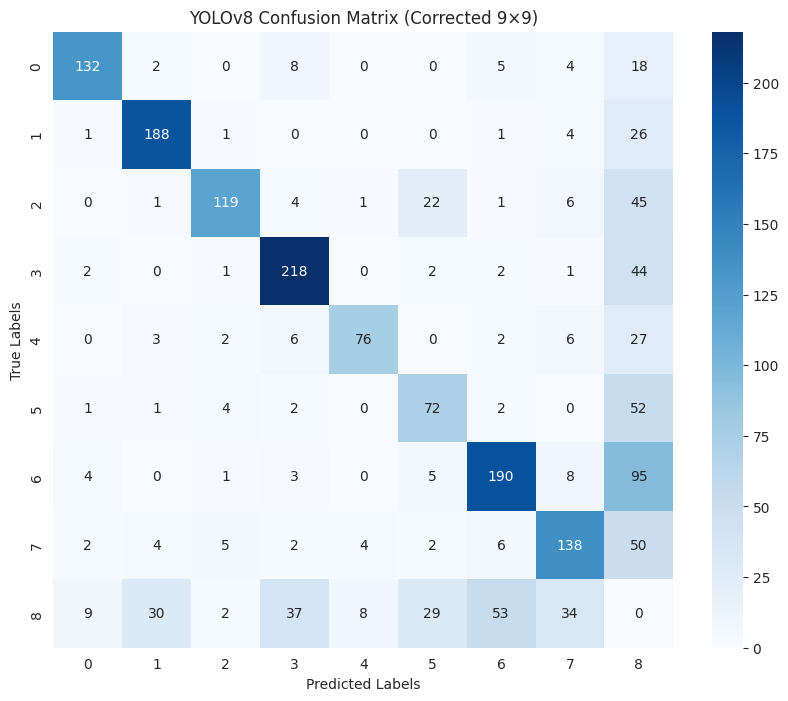

In [ ]:
# Extract confusion matrix from YOLOv8 validation
conf_matrix = metrics.confusion_matrix.matrix  # Corrected method

# Convert to NumPy array
conf_matrix_np = conf_matrix.cpu().numpy() if isinstance(conf_matrix, torch.Tensor) else np.array(conf_matrix)

# Trim to 9x9 (remove the last row and column)
conf_matrix_np = conf_matrix_np[:9, :9]  # Keeping only the first 9 rows and columns

# Print the new shape to verify
print(conf_matrix_np.shape)  # Should print (9, 9)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_np, annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("YOLOv8 Confusion Matrix (Corrected 9×9)")
plt.show()


this isnot needed as we are extracting with the YOLOv8 and not this bw histogram and LBP methods

In [ ]:
# def extract_features(model, image_path, layer_index=7):
#     device = next(model.parameters()).device
#     img = cv2.imread(image_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_tensor = torch.from_numpy(img).float().permute(2, 0, 1) / 255.0
#     img_tensor = img_tensor.unsqueeze(0).to(device)

#     with torch.no_grad():
#         x = img_tensor
#         for i in range(layer_index + 1):
#             x = model.model.model[i](x)
#         features = x

#     return features

# def visualize_features(image_path):
#     img = cv2.imread(image_path)
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Grayscale Histogram
#     hist, bins = np.histogram(img_gray.flatten(), 256, [0, 256])

#     # LBP Texture
#     lbp = local_binary_pattern(img_gray, 8, 1, method="uniform")
#     lbp_hist, _ = np.histogram(lbp, density=True, bins=256, range=(0, 256))

#     # HOG Features (REMOVE channel_axis for grayscale)
#     hog_features, hog_image = hog(
#         img_gray,
#         orientations=9,
#         pixels_per_cell=(8, 8),
#         cells_per_block=(2, 2),
#         visualize=True,
#         feature_vector=True
#     )

#     # Plotting
#     fig, axs = plt.subplots(1, 4, figsize=(20, 5))

#     axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     axs[0].set_title('Original Image')
#     axs[0].axis('off')

#     axs[1].plot(hist)
#     axs[1].set_title('Grayscale Histogram')

#     axs[2].imshow(lbp, cmap='gray')
#     axs[2].set_title('LBP Texture')
#     axs[2].axis('off')

#     axs[3].imshow(hog_image, cmap='gray')
#     axs[3].set_title('HOG Features')
#     axs[3].axis('off')

#     plt.show()

# # Usage example (ensure your model is on the correct device)
# image_path = "/content/waste-classification8K-1/test/images/glass-215-_jpg.rf.b1b21330043aec65678b7f51217090d6.jpg"

# # Set device and move model
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# features = extract_features(model, image_path)
# print(f"Extracted features shape: {features.shape}")

# visualize_features(image_path)

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


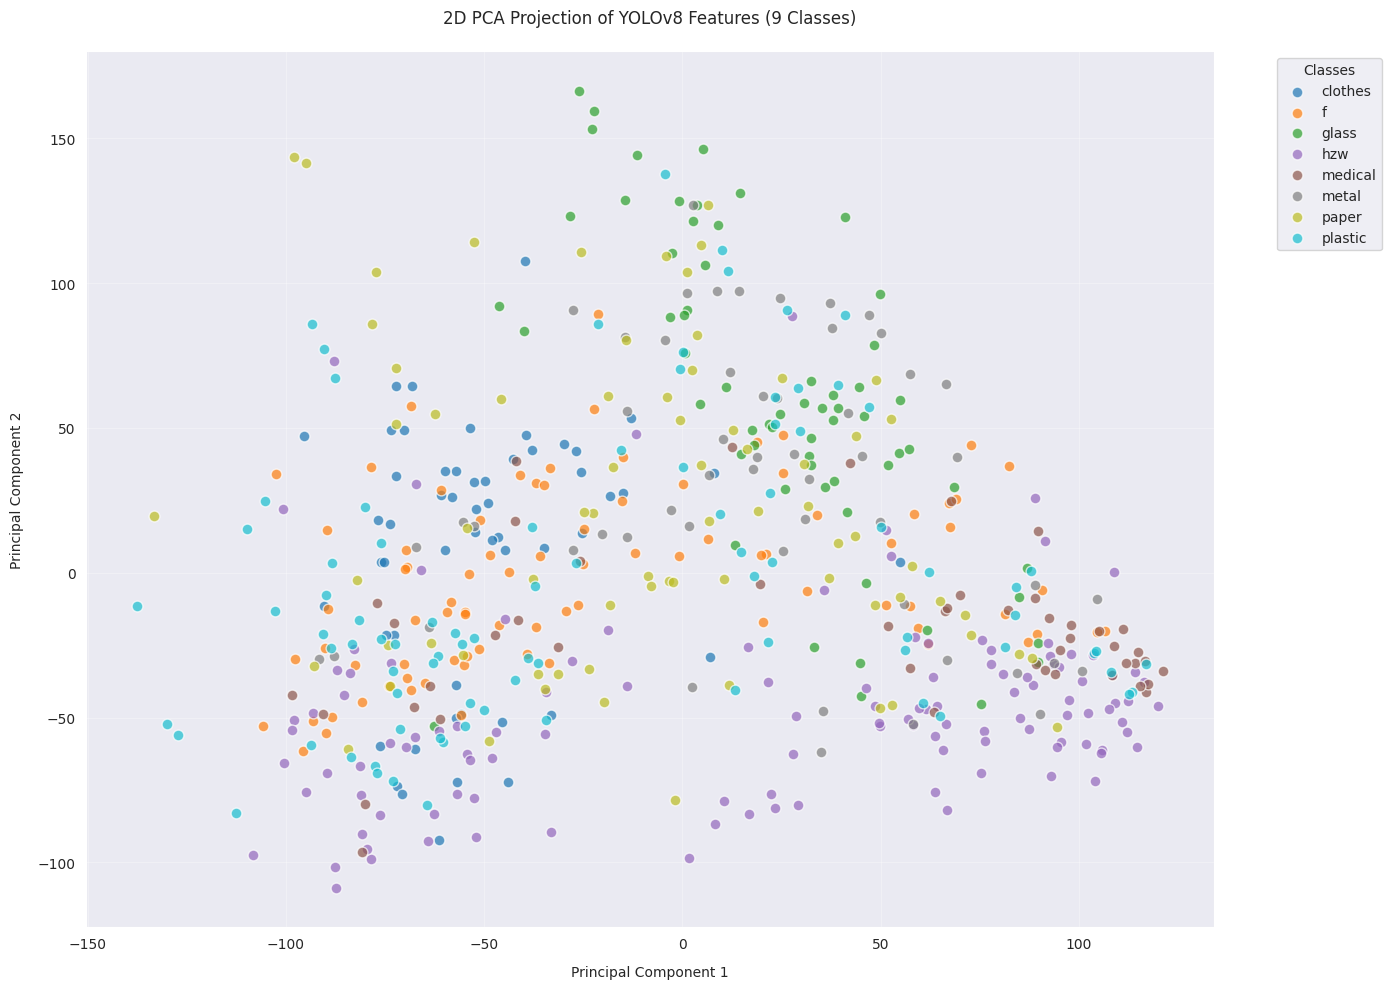

In [ ]:
def extract_features_with_labels(model, image_dir, layer_index=7):
    """
    Extract features and class labels from all images in a directory
    Args:
        model: Trained YOLOv8 model
        image_dir: Path to directory containing test images
        layer_index: Index of the layer to extract features from
    Returns:
        features: Feature vectors for all images
        encoded_labels: Numerical labels for classes
        class_names: Actual class names (for legend)
    """
    device = next(model.parameters()).device
    features_list = []
    labels = []
    class_names = []

    # Get all image paths in the test directory
    image_paths = [os.path.join(image_dir, f)
                  for f in os.listdir(image_dir)
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image_path in image_paths:
        # Extract class label from filename (e.g., "glass-215.jpg" → "glass")
        filename = os.path.basename(image_path).split('-')[0]
        labels.append(filename)
        class_names.append(filename)  # Track class names for legend

        # Read and preprocess image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Could not read {image_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_tensor = torch.from_numpy(img).float().permute(2, 0, 1) / 255.0
        img_tensor = img_tensor.unsqueeze(0).to(device)

        with torch.no_grad():
            x = img_tensor
            # Traverse through model layers up to specified index
            for i in range(layer_index + 1):
                x = model.model.model[i](x)
            features = x.flatten().cpu().numpy()
            features_list.append(features)

    # Encode labels numerically for visualization
    unique_labels = np.unique(labels)
    label_encoder = {label: i for i, label in enumerate(unique_labels)}
    encoded_labels = [label_encoder[label] for label in labels]

    return np.array(features_list), encoded_labels, class_names

def visualize_pca_projection(features, encoded_labels, class_names):
    """
    Visualize PCA projection with class color coding
    Args:
        features: Feature vectors
        encoded_labels: Numerical class labels
        class_names: Actual class names for legend
    """
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features_scaled)

    # Create plot with color mapping
    plt.figure(figsize=(14, 10))
    unique_labels = np.unique(encoded_labels)
    cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # 10-class colormap

    for label in unique_labels:
        idx = np.where(encoded_labels == label)[0]
        if idx.size == 0:
            continue  # Skip empty classes
        class_name = class_names[idx[0]]  # Get first occurrence's class name
        plt.scatter(principal_components[idx, 0],
                    principal_components[idx, 1],
                    c=[cmap(label)],
                    label=class_name,
                    alpha=0.7,
                    edgecolor='w',
                    s=60)

    plt.title('2D PCA Projection of YOLOv8 Features (9 Classes)', pad=20)
    plt.xlabel('Principal Component 1', labelpad=10)
    plt.ylabel('Principal Component 2', labelpad=10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Classes')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Configuration parameters
    model_path = "/content/yolov8_trained_recyclable.pt"  # Update with your model path
    test_image_dir = "/content/waste-classification8K-1/test/images"
    layer_index = 7  # Adjust based on your model's layer structure

    # Load model and prepare
    model = YOLO(model_path)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device).eval()  # Important: set to evaluation mode

    # Extract features and labels
    features, encoded_labels, class_names = extract_features_with_labels(
        model, test_image_dir, layer_index
    )

    # Visualize
    visualize_pca_projection(features, encoded_labels, class_names)

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C2f(
    (cv1): Conv(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0): Bottleneck(
        (cv1): Conv(
        

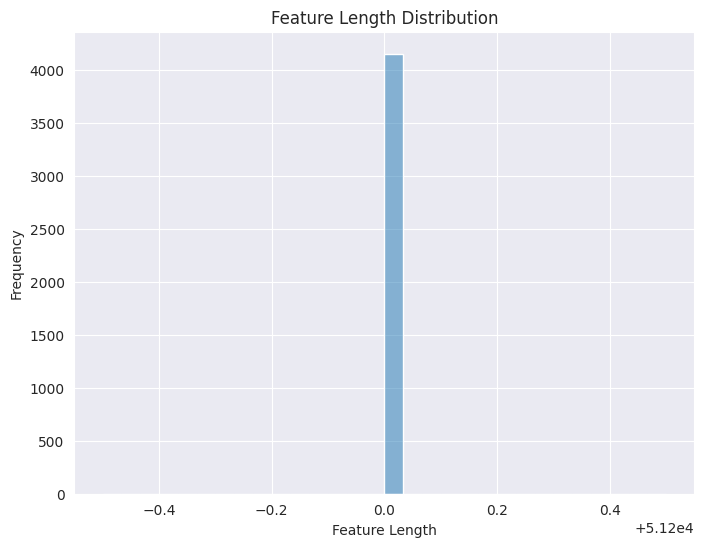

In [15]:
# Print model layers to choose a valid layer_index (e.g., 6 for earlier layers)
print(model.model.model)
layer_index = 6  # Choose a layer with lower computational cost

def extract_features_in_batches(model, image_dir, layer_index=6, batch_size=4):
    """
    Extract features and labels from images in batches to reduce memory usage.
    Images are resized to a lower resolution (e.g., 320x320) for faster processing.
    """
    device = next(model.parameters()).device
    features_list = []
    labels = []

    # List all image paths in the given directory
    image_paths = [os.path.join(image_dir, f)
                   for f in os.listdir(image_dir)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Process images in batches
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i+batch_size]
        for path in batch_paths:
            try:
                # Extract class name from filename (e.g., "glass-215.jpg" -> "glass")
                filename = os.path.basename(path).split('-')[0]
                # Preprocess image
                img = cv2.imread(path)
                if img is None:
                    print(f"Warning: Could not read {path}")
                    continue
                # Resize to reduce memory consumption (adjust as needed)
                img = cv2.resize(img, (320, 320))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_tensor = torch.from_numpy(img).float().permute(2, 0, 1) / 255.0
                img_tensor = img_tensor.unsqueeze(0).to(device)

                with torch.no_grad():
                    x = img_tensor
                    for j in range(layer_index + 1):
                        x = model.model.model[j](x)
                    features = x.flatten().cpu().numpy()
                    features_list.append(features)
                    labels.append(filename)
            except Exception as e:
                print(f"Error processing {path}: {str(e)}")
                continue
        # Free memory after each batch
        gc.collect()
        torch.cuda.empty_cache()

    return np.array(features_list), labels

# Extract features in batches from the training images
train_image_dir = "/content/waste-classification8K-1/train/images"
features_train, labels_train = extract_features_in_batches(model, train_image_dir, layer_index=6, batch_size=4)

# Check that features were successfully extracted
if features_train.size == 0:
    raise ValueError("No valid features extracted. Check layer index and image paths.")

Feature Shape: (4156, 51200)
Feature Min: -0.2784646
Feature Max: 10.6825485
Feature Mean: 0.013607959
Feature Std: 0.39709195
Feature 0: [    0.51243     0.87804     0.55342      0.5627     0.20996     0.18162]...
Feature 1: [      0.219     0.85776     0.36096     0.18059      0.2089     0.27571]...
Feature 2: [  -0.091631     0.14313     0.18387     0.26577     0.26746     0.31087]...
Min Feature Magnitude: 71.26754
Max Feature Magnitude: 120.34701
Mean Feature Magnitude: 89.70006


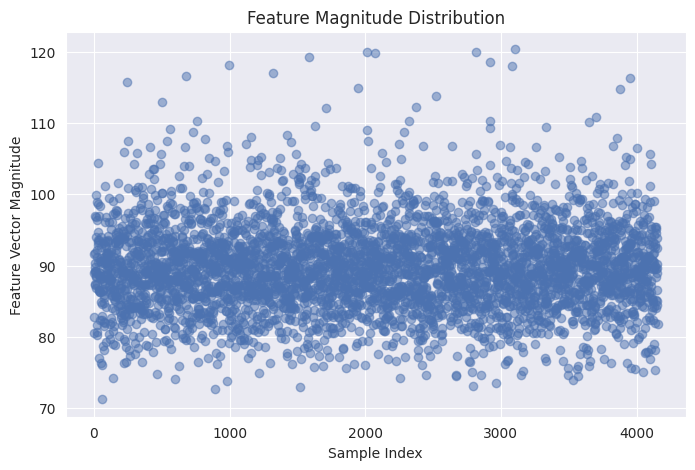

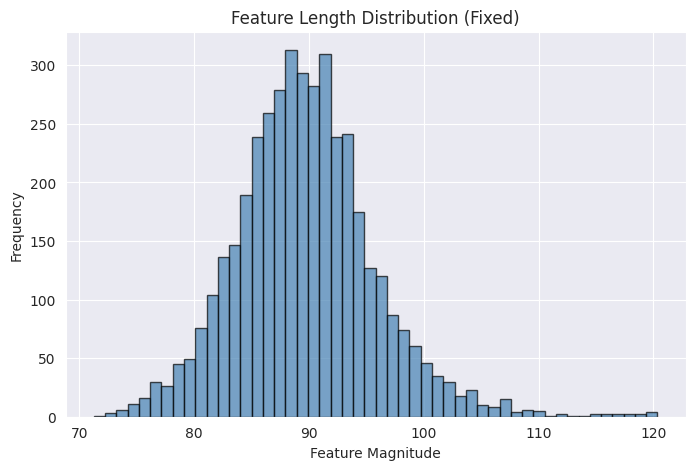

In [21]:
print("Feature Shape:", features_train.shape)
print("Feature Min:", np.min(features_train))
print("Feature Max:", np.max(features_train))
print("Feature Mean:", np.mean(features_train))
print("Feature Std:", np.std(features_train))
for i in range(3):  # Print first 5 samples
    print(f"Feature {i}: {features_train[i][:6]}...")  # Print first 6 values of each feature vector

feature_lengths = np.linalg.norm(features_train, axis=1)  # Compute the L2 norm (magnitude) of each feature vector
print("Min Feature Magnitude:", np.min(feature_lengths))
print("Max Feature Magnitude:", np.max(feature_lengths))
print("Mean Feature Magnitude:", np.mean(feature_lengths))

plt.figure(figsize=(8, 5))
plt.plot(feature_lengths, 'bo', alpha=0.5)  # Scatter plot of feature magnitudes
plt.xlabel("Sample Index")
plt.ylabel("Feature Vector Magnitude")
plt.title("Feature Magnitude Distribution")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(feature_lengths, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel("Feature Magnitude")
plt.ylabel("Frequency")
plt.title("Feature Length Distribution")
plt.grid(True)
plt.show()

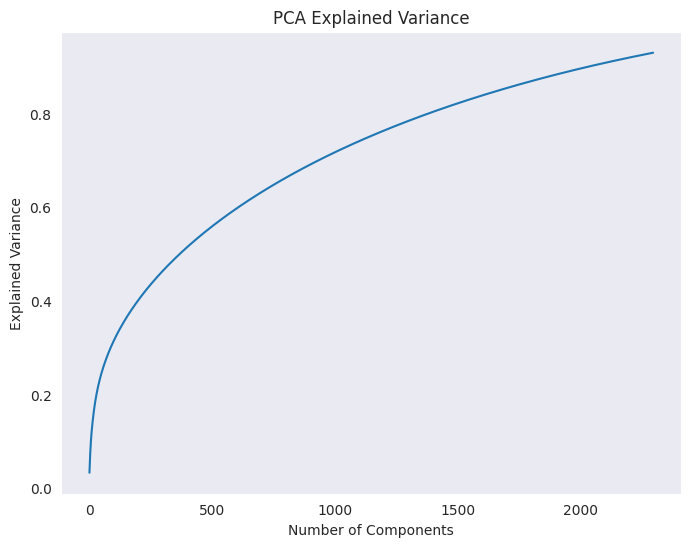

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc',
                                              SVC(class_weight={0: 1.2256637168141593,
                                                                1: 0.7393238434163701,
                                                                2: 1.1509695290858726,
                                                                3: 0.6305007587253414,
                                                                4: 1.6167315175097277,
                                                                5: 1.4630281690140845,
                                                                6: 0.9443181818181818,
                                                                7: 0.9845971563981043},
                                                  probability=True,
                                                  random_state=42))]),
                   n_iter=12, n_jobs=-1,
                   param_distributions={'svc__C': [0.1, 1, 10, 100],
                                        'svc__degree': [3, 4],
                                        'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
                                        'svc__kernel': ['linear', 'sigmoid',
                                                        'poly', 'rbf']},
                   random_state=42, scoring='accuracy', verbose=1)

In [22]:
# Encode labels
label_encoder = LabelEncoder()
labels_train_encoded = label_encoder.fit_transform(labels_train)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    features_train,
    labels_train_encoded,
    test_size=0.2,
    random_state=42
)

# Compute Class Weights
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

# Apply PCA for dimensionality reduction (reduce training time and noise)
pca = PCA(n_components=0.93)  # Retain 93% variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Visualize PCA variance explained
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

# Create a Pipeline: StandardScaler -> SVC
pipeline = make_pipeline(
    StandardScaler(),
    SVC(probability=True, class_weight=class_weight_dict, random_state=42)
)

# Define Hyperparameter Grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'sigmoid', 'poly', 'rbf'],
    'svc__degree': [3, 4]  # Only relevant if kernel is 'poly'
}

# Set up RandomizedSearchCV with 5-fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=12,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Train the Model with Randomized Search
random_search.fit(X_train_pca, y_train)

Best parameters: {'svc__kernel': 'linear', 'svc__gamma': 0.1, 'svc__degree': 4, 'svc__C': 10}
Best cross-validation score: 0.4617895642721261
Validation Accuracy: 0.7908653846153846
Validation Classification Report:
               precision    recall  f1-score   support

     clothes       0.88      0.70      0.78        83
           f       0.85      0.95      0.90       123
       glass       0.75      0.82      0.79       102
         hzw       0.81      0.88      0.85       172
     medical       0.76      0.64      0.69        66
       metal       0.80      0.66      0.72        73
       paper       0.76      0.77      0.76       108
     plastic       0.70      0.70      0.70       105

    accuracy                           0.79       832
   macro avg       0.79      0.77      0.77       832
weighted avg       0.79      0.79      0.79       832



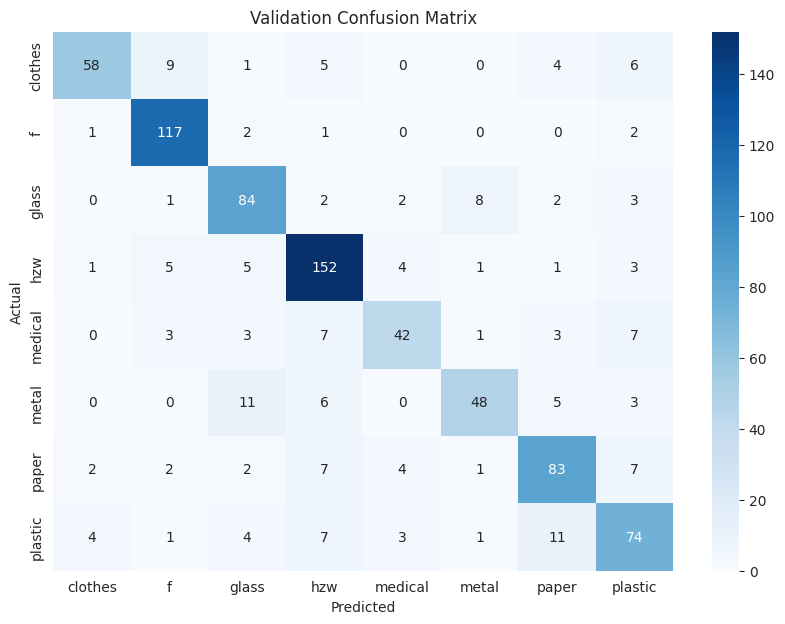

Test Accuracy: 0.7664359861591695
Test Classification Report:
               precision    recall  f1-score   support

     clothes       0.87      0.85      0.86        54
           f       0.82      0.96      0.89        83
       glass       0.71      0.76      0.73        63
         hzw       0.76      0.81      0.78       120
     medical       0.94      0.64      0.76        47
       metal       0.66      0.55      0.60        53
       paper       0.69      0.76      0.72        72
     plastic       0.76      0.67      0.72        86

    accuracy                           0.77       578
   macro avg       0.78      0.75      0.76       578
weighted avg       0.77      0.77      0.76       578



['label_encoder.pkl']

In [23]:
# Evaluate on Validation Set
y_val_pred = random_search.best_estimator_.predict(X_val_pca)
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

# Extract features from the test set only after training
test_image_dir = "/content/waste-classification8K-1/test/images"
features_test, labels_test = extract_features_in_batches(model, test_image_dir, layer_index=6, batch_size=4)
labels_test_encoded = label_encoder.transform(labels_test)

# Apply trained PCA to test set
X_test_pca = pca.transform(features_test)

y_test_pred = random_search.best_estimator_.predict(X_test_pca)
print("Test Accuracy:", accuracy_score(labels_test_encoded, y_test_pred))
print("Test Classification Report:\n", classification_report(labels_test_encoded, y_test_pred, target_names=label_encoder.classes_))

# Save the Best Model, PCA, and Label Encoder
joblib.dump(random_search.best_estimator_, 'svm_best_model.pkl')
joblib.dump(pca, 'pca.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')